In [1]:
import string
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn import metrics
from sklearn import tree
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("gpa_iq.csv", encoding='latin-1')
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [10]:

df = pd.get_dummies(df, columns=['obs','gpa','iq','gender','concept'])
df.head()
df.drop(['obs'],axis=1)

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_0,activities_1,nursery_0,nursery_1,higher_0,higher_1,internet_0,internet_1,romantic_0,romantic_1
0,18,2,2,0,4,3,4,1,1,3,...,True,False,False,True,False,True,True,False,True,False
1,17,1,2,0,5,3,3,1,1,3,...,True,False,True,False,False,True,False,True,True,False
2,15,1,2,3,4,3,2,2,3,3,...,True,False,False,True,False,True,False,True,True,False
3,15,1,3,0,3,2,2,1,1,5,...,False,True,False,True,False,True,False,True,False,True
4,16,1,2,0,4,3,2,1,2,5,...,True,False,False,True,False,True,True,False,True,False


In [11]:
df.columns
#df.drop(['G1','G2','G3'],axis=1)



,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_0,activities_1,nursery_0,nursery_1,higher_0,higher_1,internet_0,internet_1,romantic_0,romantic_1
0,18,2,2,0,4,3,4,1,1,3,...,True,False,False,True,False,True,True,False,True,False
1,17,1,2,0,5,3,3,1,1,3,...,True,False,True,False,False,True,False,True,True,False
2,15,1,2,3,4,3,2,2,3,3,...,True,False,False,True,False,True,False,True,True,False
3,15,1,3,0,3,2,2,1,1,5,...,False,True,False,True,False,True,False,True,False,True
4,16,1,2,0,4,3,2,1,2,5,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,2,2,5,5,4,4,5,4,...,True,False,False,True,False,True,True,False,True,False
391,17,2,1,0,2,4,5,3,4,2,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,3,5,5,3,3,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,1,0,4,4,1,3,4,5,...,True,False,True,False,False,True,False,True,True,False


MSE : 1.8507082118619728e-17


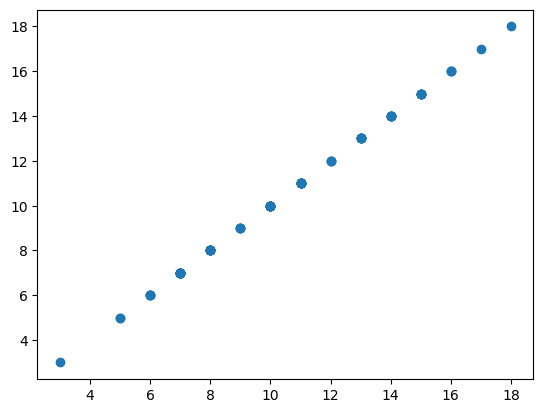

In [12]:
y = df['G1']
X = df.drop(['G1'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1 = LinearRegression()
model1.fit(X_train, y_train) 
y_hat = model1.predict(X_test)
print('MSE :' , mean_squared_error(y_test, y_hat))
plt.scatter(y_test, y_hat)
